In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = open('gamma0.pickle', 'rb')
solutions = pickle.load(file)
file.close()

In [11]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

def f(t,pos):
  x_mod,y_mod = modulo_grid(*pos)
  t = 30
  dx = -np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  return [dx,dy]

[0.06270114475943513, 0.0939608538337529, 0.06490387671847293, 0.02185801276026889, 0.029782947526906835, 0.043902743788164035, 0.04581602193738034, 0.05533131899401551, 0.029570289094274588, 0.04268224928088275, 0.034400128199379924, 0.0415378995273309, 0.029055626264314998, 0.036602579154852564, 0.047675501400078577, 0.04519006105312633, 0.05589024642639924, 0.03213766073641589, 0.06072039816955592, 0.06236504623674374, 0.047909952116955916, 0.05529124882936744, 0.07613421539895922, 0.09368880488077812, 0.058246158462815105, 0.09192719740601961, 0.07485401573846685, 0.06895136523998763, 0.06981528372664852, 0.06410690968926269, 0.07093030275166154, 0.05120881931379862, 0.06247961056283703, 0.060856452465440275, 0.053030041730252976, 0.0469253048720347, 0.03776672862798056, 0.046660169796659004, 0.053788565030415875, 0.022023428586651662, 0.028692364943282457, 0.05732637883270614, 0.05268245954611667, 0.035973764604231726, 0.05659798284504399, 0.05923685696802802, 0.0660083860298628, 

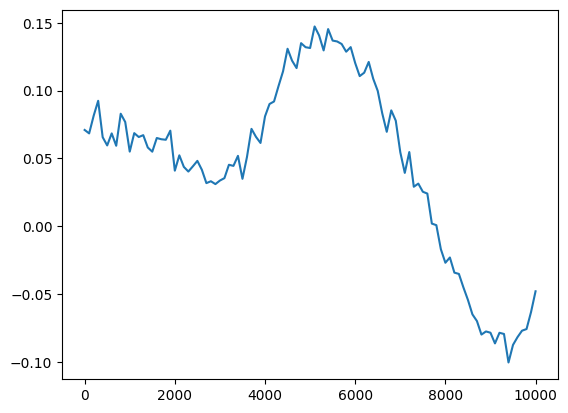

In [19]:
#all velocities in one list
initial_time = 0
time_steps_list =  range(0,10001, 100)
x_vel_list=[]
y_vel_list=[]

for time in time_steps_list:
    x_vel_sum = 0
    y_vel_sum = 0
    for sol in solutions:


        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        new_x = x[time] #finds new indices
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        x_vel_sum += x_vel
        y_vel = vel[1]
        y_vel_sum += y_vel

    x_vel_list.append(x_vel_sum/100)
    y_vel_list.append(y_vel_sum/100)
        
print(x_vel_list)
print(y_vel_list)

fig, ax = plt.subplots()
ax.plot(time_steps_list, y_vel_list)

0.021035717368162295
-0.018165360850759645
-0.01419146520241729
0.002068481120810679
0.0073273812311038826
0.007663673163220091
0.0038189531454933057
0.001679724279134884
0.006136566808089908
0.0025091263264015416
0.003440320193186124
0.0063878210807743205
0.005712552276098756
0.002747952601278595
0.005553428094591802
0.0015957200709103326
0.0034226020308585695
0.0021146702947299322
0.002244216045384088
0.0026721452140106745
0.0032807847440966837
0.0033484273581694205
0.0007782158123210845
0.0016433270972908392
0.0019928873879956777
0.0006110777852143047
0.001594881865949403
0.000992354699945403
-2.8481002261500463e-05
-0.0004440947672842554
-0.0009670586363922403
-0.00010233459915305426
0.0004245837396591658
-0.0013396622088349716
-0.0006337837139964737
-0.001001958795516067
-6.211333678072979e-05
-0.0008895974249565642
-0.00103184588093869
-0.0010195380180910503
-0.0009753044507176537
-0.0008397652426283393
-0.0006333237088078106
-0.0006603924631183715
-0.0009857035838176493
-0.00173

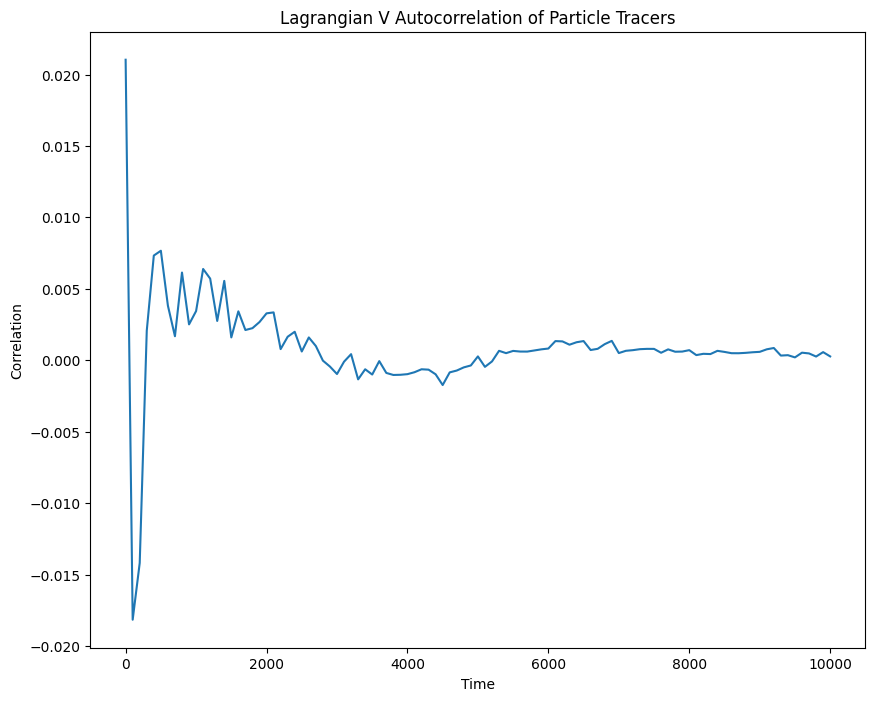

In [21]:
#sus version

vaf_list=[] #empty velocity autocorrelations list
n = 10001
time_steps_list= range(0,10001, 100)

x_sq = 0
y_sq = 0

for time in time_steps_list:
    
    dot_prod = 0 #initialise dot product for each different time
    
    for sol in solutions:

        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        initial_time = 0
        initial_x = x[0]
        initial_y = y[0]
        initial_x_vel = f(initial_time, [initial_x, initial_y])[0]
        initial_y_vel = f(initial_time, [initial_x, initial_y])[1]
        
        new_x = x[time]
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        y_vel = vel[1]
        
        x_sq += x_vel**2
        y_sq += y_vel**2
        speed_sq = x_sq + y_sq

        dot_prod += initial_y_vel * y_vel 
        
    vaf_list.append(dot_prod/speed_sq) 

for vaf in vaf_list:
    print(vaf)

fig, ax = plt.subplots()
ax.plot(time_steps_list, vaf_list)
fig.set_size_inches(10, 8)
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Lagrangian V Autocorrelation of Particle Tracers')
plt.show()




[1.0, 0.9752448317326499, 0.9493208644139616, 0.9217061782920245, 0.8869844596171615, 0.8482105186743913, 0.804486429327253, 0.7518883652138834, 0.700792632038296, 0.6459397849751727, 0.5867006464795675, 0.527800867466746, 0.4655939112389476, 0.4037440233835807, 0.3417525755759742, 0.28041143188321965, 0.21836012488798012, 0.16032972385703406, 0.10430885518579881, 0.046344586943270094, -0.0054645404296768995, -0.058210716483431124, -0.10840351315982101, -0.15075043781123834, -0.19154660071860094, -0.22906826074681377, -0.2627929663217077, -0.29201110787951295, -0.320785997896918, -0.34142405336564974, -0.36383281484177016, -0.3789561229260058, -0.3881991520599679, -0.39576556868140056, -0.4030500075024106, -0.40286920826072997, -0.4000009603773874, -0.3929553912170547, -0.38015096309500057, -0.37003482009940375, -0.357789469559906, -0.34229620902498065, -0.3223674924705576, -0.30370973807112855, -0.2828423334255224, -0.261501119745824, -0.23836697745945243, -0.21308465946637759, -0.191

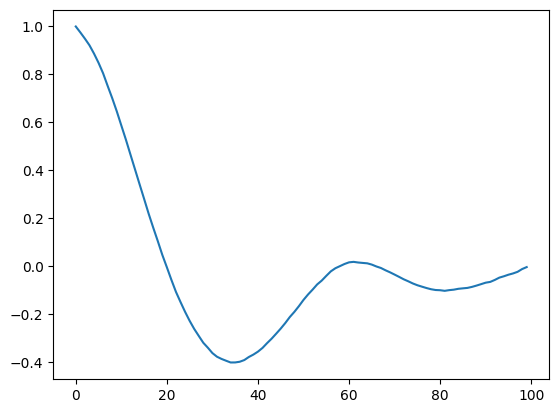

In [27]:
#more correct method of autocorrelation

y_series_mean = np.mean(y_vel_list)
n = 100
steps_list= range(0, 100)
acf_lag_list=[]

#working out s0
s0 = 0
k = 0
for i in range(1, n+1):
    s0 += (1/n)*(y_vel_list[i] - y_series_mean)*(y_vel_list[i+k] - y_series_mean)

for k in steps_list:
    acf_lag = 0
    for i in range(1, n-k+1):

        acf_lag += (1/n)*(y_vel_list[i] - y_series_mean)*(y_vel_list[i+k] - y_series_mean)

    acf_lag_list.append(acf_lag/s0)
    
print(acf_lag_list)
plt.plot(steps_list, acf_lag_list)
plt.show()